In [1]:
import numpy as np
X = np.array([[18], [23], [28], [33], [38], [43], [48], [53], [58], [63]])
y = np.array([[871], [1132], [1042], [1356], [1488], [1638], [1569], [1754], [1866], [1900]])

In [39]:
np.random.seed(0)
X = np.random.rand(10).reshape(-1, 1)
y = np.random.rand(10).reshape(-1, 1)

In [40]:
X

array([[0.5488135 ],
       [0.71518937],
       [0.60276338],
       [0.54488318],
       [0.4236548 ],
       [0.64589411],
       [0.43758721],
       [0.891773  ],
       [0.96366276],
       [0.38344152]])

In [42]:
y

array([[0.79172504],
       [0.52889492],
       [0.56804456],
       [0.92559664],
       [0.07103606],
       [0.0871293 ],
       [0.0202184 ],
       [0.83261985],
       [0.77815675],
       [0.87001215]])

In [43]:
from sklearn.preprocessing import StandardScaler
scaler_x = StandardScaler()
X = scaler_x.fit_transform(X)

In [44]:
X

array([[-0.36293708],
       [ 0.53895184],
       [-0.07048605],
       [-0.38424253],
       [-1.04139636],
       [ 0.16331669],
       [-0.96587166],
       [ 1.49617496],
       [ 1.88587438],
       [-1.25938418]])

In [45]:
scaler_y = StandardScaler()
y = scaler_y.fit_transform(y)

In [46]:
y

array([[ 0.71788033],
       [-0.054193  ],
       [ 0.06081054],
       [ 1.11113318],
       [-1.39917059],
       [-1.35189608],
       [-1.54844937],
       [ 0.83801036],
       [ 0.67802298],
       [ 0.94785165]])

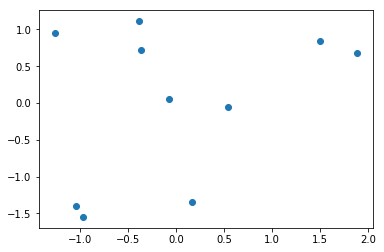

In [47]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(X, y)

# Fórmula da regressão linear simples
y = b0 + b1 * x

In [48]:
np.random.seed(0)
np.random.rand(2)

array([0.5488135 , 0.71518937])

In [49]:
import tensorflow as tf

In [64]:
b0 = tf.Variable(0.1)
b1 = tf.Variable(0.9)

In [97]:
erro = tf.losses.mean_squared_error(y, (b0 + b1 * X))
otimizador = tf.train.GradientDescentOptimizer(learning_rate = 1)
treinamento = otimizador.minimize(erro)
init = tf.global_variables_initializer()

In [98]:
with tf.Session() as sess:
    writer = tf.summary.FileWriter('output', sess.graph)
    sess.run(init)
    #print(sess.run(b0))
    #print(sess.run(b1))
    for i in range(1000):
        sess.run(treinamento)
    b0_final, b1_final = sess.run([b0, b1])
    writer.close()

In [99]:
b0_final

0.0999999

In [100]:
b1_final

0.9

In [101]:
previsoes = b0_final + b1_final * X
previsoes

array([[-0.22664347],
       [ 0.58505654],
       [ 0.03656245],
       [-0.24581837],
       [-0.8372568 ],
       [ 0.24698492],
       [-0.76928457],
       [ 1.44655732],
       [ 1.79728679],
       [-1.03344584]])

In [102]:
type(previsoes)

numpy.ndarray

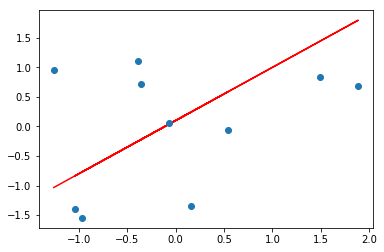

In [103]:
plt.plot(X, previsoes, color = 'red')
plt.plot(X, y, 'o')

In [104]:
scaler_x.transform([[40]])

array([[213.49373221]])

In [112]:
previsao = scaler_y.inverse_transform(b0_final + b1_final * scaler_x.transform([[40]]))
previsao

array([[65.99139394]])

In [113]:
y1 = scaler_y.inverse_transform(y)
y1

array([[0.79172504],
       [0.52889492],
       [0.56804456],
       [0.92559664],
       [0.07103606],
       [0.0871293 ],
       [0.0202184 ],
       [0.83261985],
       [0.77815675],
       [0.87001215]])

In [89]:
previsoes1 = scaler_y.inverse_transform(previsoes)
previsoes1

array([[0.50595744],
       [0.60880036],
       [0.5393058 ],
       [0.50352797],
       [0.42859234],
       [0.56596646],
       [0.43720446],
       [0.71795306],
       [0.76239071],
       [0.40373506]])

In [109]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae = mean_absolute_error(y1, previsoes1)
mse = mean_squared_error(y1, previsoes1)

In [110]:
mae

0.2666569877767785

In [111]:
mse

0.10288361396149644